#  **Project Title:**
Air Quality Prediction using Machine Learning

#  **Introduction:**

The project aims to predict air quality index (AQI) levels using historical air quality data.
This project is important as poor air quality has adverse effects on human health and the environment.


# **Problem Statement:**

Air Pollution Analysis and Prediction for Urban Centers

Air pollution is a growing concern worldwide, especially in urban areas, where industrial activities, traffic, and other human actions lead to deteriorating air quality. The dataset provided includes data on various pollutants and the Air Quality Index (AQI) across multiple cities over time. This project aims to analyze the patterns of pollution, identify the key contributors to poor air quality, and predict future AQI levels based on historical data.



# **1. Understand the data**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns



#  **Features:**

City: Names of various cities.

Date: Date of each air quality measurement.

PM2.5: Fine particulate matter (diameter < 2.5 micrometers).

PM10: Particulate matter (diameter < 10 micrometers).

NO: Nitric oxide concentration.

NO2: Nitrogen dioxide concentration.

NOx: Total nitrogen oxides concentration.

NH3: Ammonia concentration.

CO: Carbon monoxide concentration.

SO2: Sulfur dioxide concentration.

O3: Ozone concentration.

Benzene, Toluene, Xylene: Concentrations of volatile organic compounds.

AQI: Air Quality Index.

AQI_Bucket:  Categorical air quality levels (e.g., "Good", "Poor").

Observations:

Missing values:  Several columns like PM2.5, PM10, and Xylene have missing data.

Pollution levels: Various pollutants like NO, CO, and Benzene show a wide range of concentrations.

AQI:  The AQI values range from 13 to a maximum of 2049, with a mean of 166, indicating varied air quality across different cities and times.

This dataset can be useful for analyzing pollution trends, health impacts, and air quality management. ​​








In [ ]:
from sklearn.preprocessing import LabelEncoder
lebel=LabelEncoder()

In [ ]:
import pandas as pd
df=pd.read_csv("city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


* check information of DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


* check the number of rows and columns in  dataset.



In [ ]:
df.shape

(29531, 16)

*  view the first 10 rows of a DataFrame.

In [ ]:
df.head(10)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


* Check for duplicate rows

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
29526,False
29527,False
29528,False
29529,False


* Check for any missing values:

In [ ]:
df.isnull().sum()

,0
City,0
Date,0
PM2.5,4598
PM10,11140
NO,3582
NO2,3585
NOx,4185
NH3,10328
CO,2059
SO2,3854


array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>, <Axes: title={'center': 'NO'}>,
        <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'NOx'}>, <Axes: title={'center': 'NH3'}>,
        <Axes: title={'center': 'CO'}>, <Axes: title={'center': 'SO2'}>],
       [<Axes: title={'center': 'O3'}>,
        <Axes: title={'center': 'Benzene'}>,
        <Axes: title={'center': 'Toluene'}>,
        <Axes: title={'center': 'Xylene'}>],
       [<Axes: title={'center': 'AQI'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

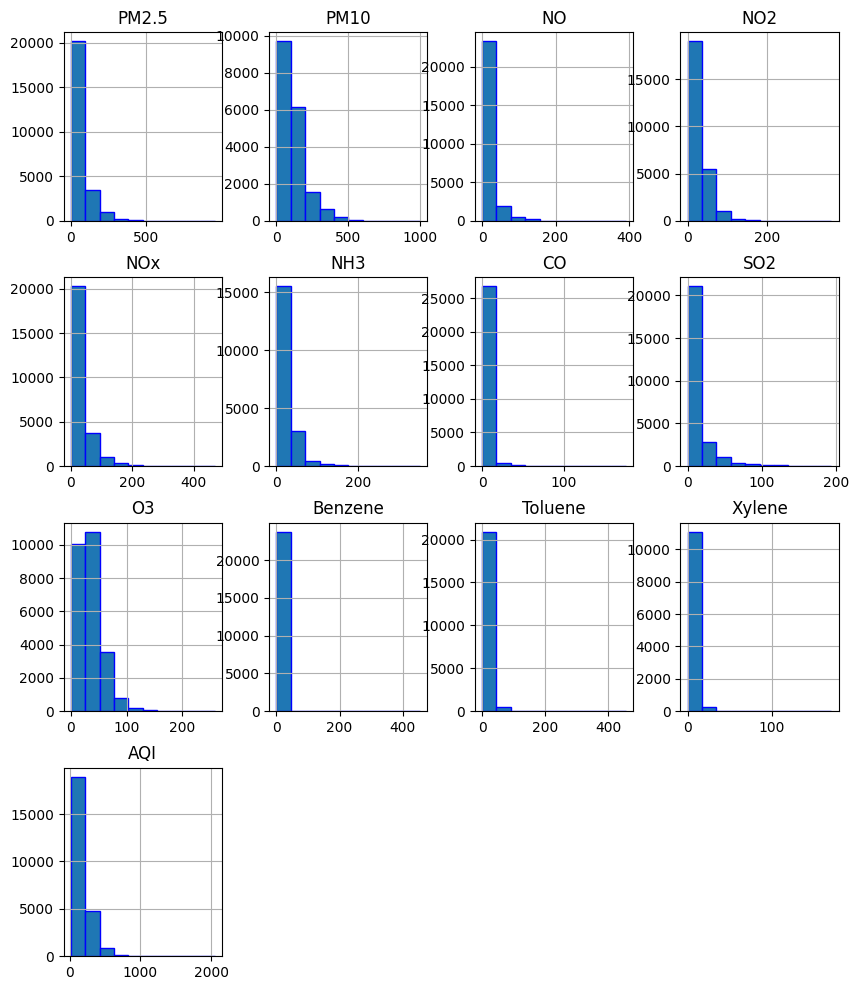

In [ ]:
df.hist(edgecolor="b",figsize=[10,12])

# **2. Data cleaning**

* Irrelevant data: The "Date", "Xylene", "AQI_Bucket"  columns not be useful for the current analysis or model.


In [ ]:
df.drop(columns=['Date'],inplace=True)

In [ ]:
df.drop(columns=['Xylene'],inplace=True)

In [ ]:
df.drop(columns=['AQI_Bucket'],inplace=True)

* filling missing values in various columns of your DataFrame df with the median of each respective column. This is a common approach to handle missing data.

In [ ]:
df["PM2.5"].fillna(df["PM2.5"].median(),inplace=True)
df["PM10"].fillna(df["PM10"].median(),inplace=True)
df["NO"].fillna(df["NO"].median(),inplace=True)
df["NO2"].fillna(df["NO2"].median(),inplace=True)
df["NOx"].fillna(df["NOx"].median(),inplace=True)
df["NH3"].fillna(df["NH3"].median(),inplace=True)
df["CO"].fillna(df["CO"].median(),inplace=True)
df["SO2"].fillna(df["SO2"].median(),inplace=True)
df["O3"].fillna(df["O3"].median(),inplace=True)
df["Benzene"].fillna(df["Benzene"].median(),inplace=True)
df["Toluene"].fillna(df["Toluene"].median(),inplace=True)
df["AQI"].fillna(df["AQI"].median(),inplace=True)

<ipython-input-15-030e213fba53>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PM2.5"].fillna(df["PM2.5"].median(),inplace=True)
<ipython-input-15-030e213fba53>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

* check for any missing values in a DataFrame

In [ ]:
df.isnull().sum()

,0
City,0
PM2.5,0
PM10,0
NO,0
NO2,0
NOx,0
NH3,0
CO,0
SO2,0
O3,0


# **3. Decriptive statistics**

* To quickly get a summary of important statistical details about the numeric columns in a DataFrame.


In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
count,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000,29531.000000
mean,64.510857,109.659366,16.642601,27.726576,31.063568,20.813789,2.153872,13.830897,33.994121,2.859874,7.140485,158.781552
std,59.807551,72.324020,21.506064,23.050531,29.477748,21.028862,6.724660,17.005647,20.202304,14.252822,17.224737,130.272413
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,13.000000
25%,32.150000,79.315000,6.210000,12.980000,14.670000,12.040000,0.540000,6.090000,20.740000,0.240000,1.280000,88.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,118.000000
75%,72.450000,111.880000,17.570000,34.665000,36.015000,21.755000,1.380000,13.810000,42.730000,2.420000,6.020000,179.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,2049.000000


# **4. Data visualization**
* A histogram is used to show the distribution of data in a dataset.

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>, <Axes: title={'center': 'NO'}>],
       [<Axes: title={'center': 'NO2'}>, <Axes: title={'center': 'NOx'}>,
        <Axes: title={'center': 'NH3'}>],
       [<Axes: title={'center': 'CO'}>, <Axes: title={'center': 'SO2'}>,
        <Axes: title={'center': 'O3'}>],
       [<Axes: title={'center': 'Benzene'}>,
        <Axes: title={'center': 'Toluene'}>,
        <Axes: title={'center': 'AQI'}>]], dtype=object)

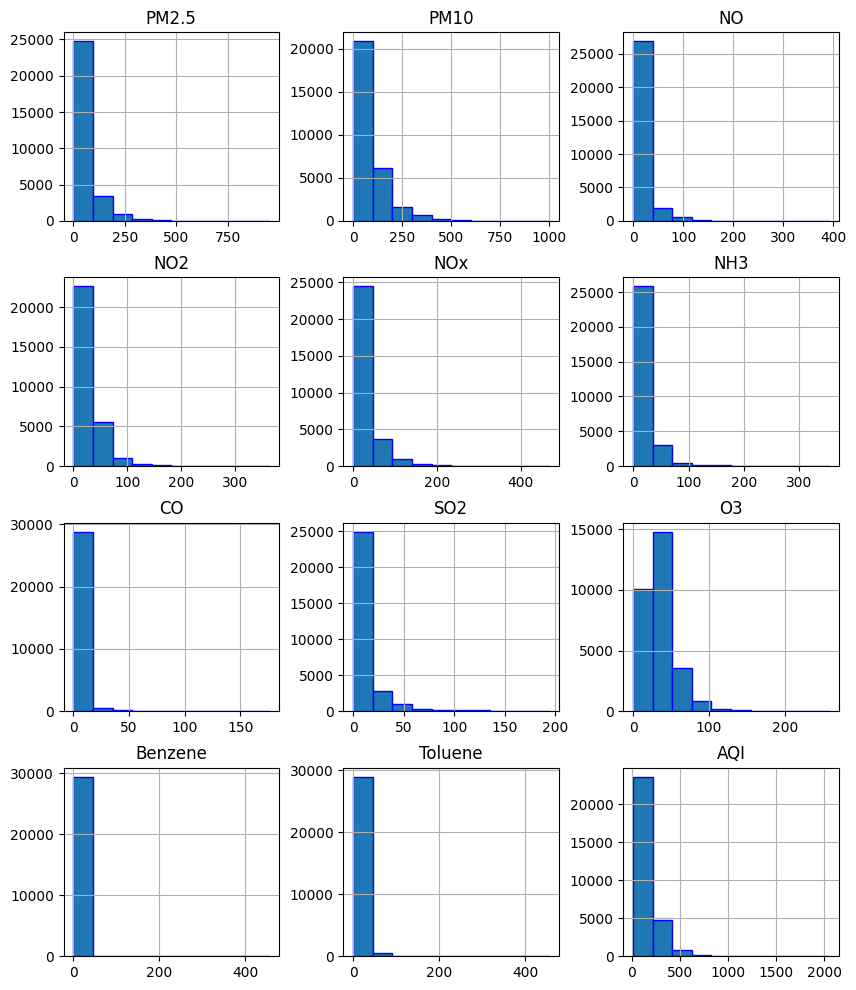

In [ ]:
df.hist(edgecolor="b",figsize=[10,12])

* it helps us quickly understand the distribution of data within a dataset

<Axes: xlabel='AQI', ylabel='Count'>

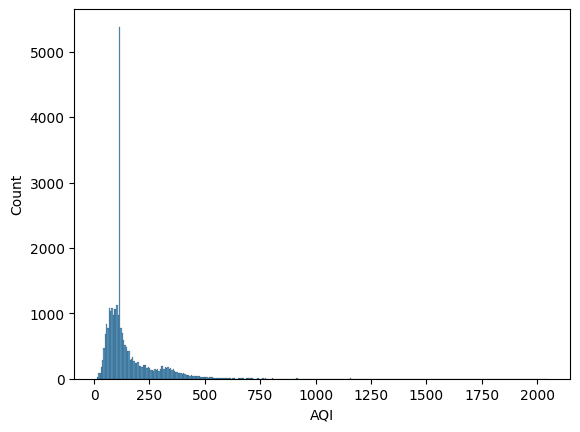

In [ ]:
sns.histplot(df["AQI"])

* LabelEncoder to convert categorical columns like"City" into numerical format. This step is usually done to prepare categorical variables for machine learning models, which typically require numerical input.

In [ ]:
df["City"]=lebel.fit_transform(df["City"])

# **5. Correlation Analysis**

* it find the correlation between columns in a dataset. Correlation measures how strongly two variables are related:

In [ ]:
correlation=df.corr()
correlation

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
City,1.000000,0.062446,-0.021395,0.047182,-0.078589,0.024948,-0.182565,-0.255886,-0.101327,0.001530,0.002070,-0.062730,-0.121778
PM2.5,0.062446,1.000000,0.520767,0.435245,0.358287,0.375938,0.164615,0.093695,0.120451,0.166064,0.030539,0.132609,0.633654
PM10,-0.021395,0.520767,1.000000,0.433864,0.352396,0.416523,0.200548,0.023932,0.165468,0.208398,0.027522,0.126400,0.447686
NO,0.047182,0.435245,0.433864,1.000000,0.465848,0.747409,0.155804,0.221445,0.174881,0.020788,0.045202,0.151930,0.438039
NO2,-0.078589,0.358287,0.352396,0.465848,1.000000,0.581938,0.151731,0.361750,0.388413,0.289435,0.042179,0.297913,0.531952
NOx,0.024948,0.375938,0.416523,0.747409,0.581938,1.000000,0.129433,0.231878,0.205912,0.089095,0.049004,0.184764,0.436282
NH3,-0.182565,0.164615,0.200548,0.155804,0.151731,0.129433,1.000000,-0.014252,-0.048679,0.076295,0.004093,0.020040,0.097916
CO,-0.255886,0.093695,0.023932,0.221445,0.361750,0.231878,-0.014252,1.000000,0.476784,0.043311,0.066022,0.285559,0.650475
SO2,-0.101327,0.120451,0.165468,0.174881,0.388413,0.205912,-0.048679,0.476784,1.000000,0.160489,0.038955,0.273314,0.454182
O3,0.001530,0.166064,0.208398,0.020788,0.289435,0.089095,0.076295,0.043311,0.160489,1.000000,0.023982,0.135498,0.199100


* The heatmap helps you easily spot correlations between variables at a glance. Darker colors indicate stronger relationships, while lighter colors indicate weaker relationships.

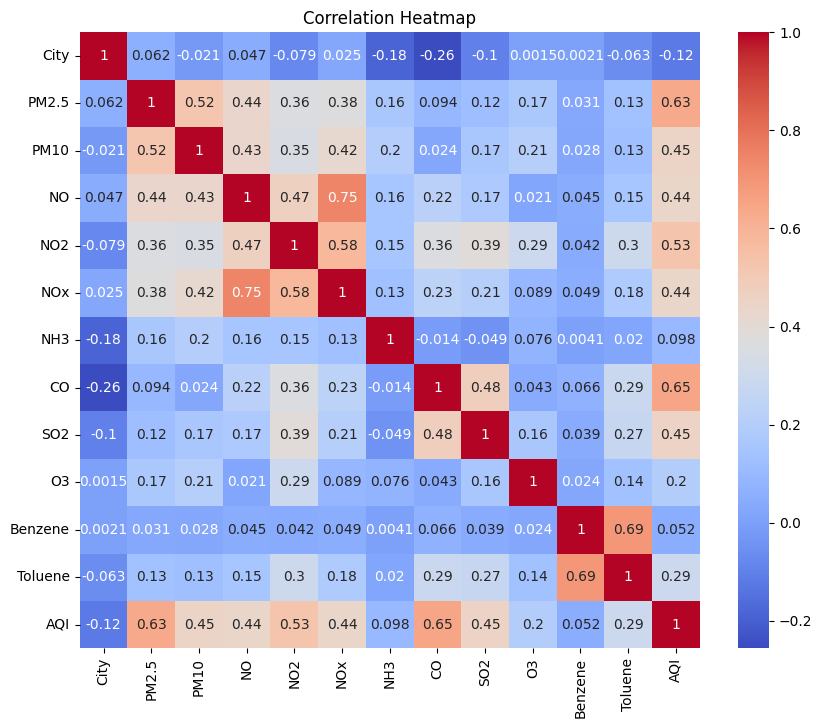

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

* Dropping columns based on their correlation with the target variable helps to simplify the model by removing features that aren't useful for prediction.

In [ ]:
# Dropping columns based on correlation with the target variable or low variance
df.drop(["City"], inplace=True, axis=1)  # weak positive relationship
df.drop(["NO"], inplace=True, axis=1)  # presumably low impact
df.drop(["Benzene"], inplace=True, axis=1)  # presumably low impact
df.drop(["NH3"], inplace=True, axis=1)  # low correlation with target variable
df.drop(["Toluene"], inplace=True, axis=1)  # possibly low variance or low impact
df.drop(["O3"], inplace=True, axis=1)  # possibly low variance or low impact


In [ ]:
df.columns

Index(['PM2.5', 'PM10', 'NO2', 'NOx', 'CO', 'SO2', 'AQI'], dtype='object')

* Plotting the original data distribution helps us understand the shape and characteristics of the data before applying any transformations or modeling

Text(0.5, 1.0, 'Original Data (Right-Skewed)')

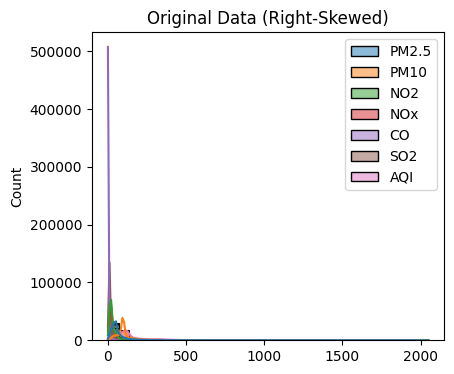

In [ ]:
# Plotting original data distribution
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(df, bins=30, kde=True)
plt.title("Original Data (Right-Skewed)")

# **6. Outlier Detection**

* it is is useful for visually inspecting the distributions and identifying outliers in multiple numerical columns of a DataFrame.


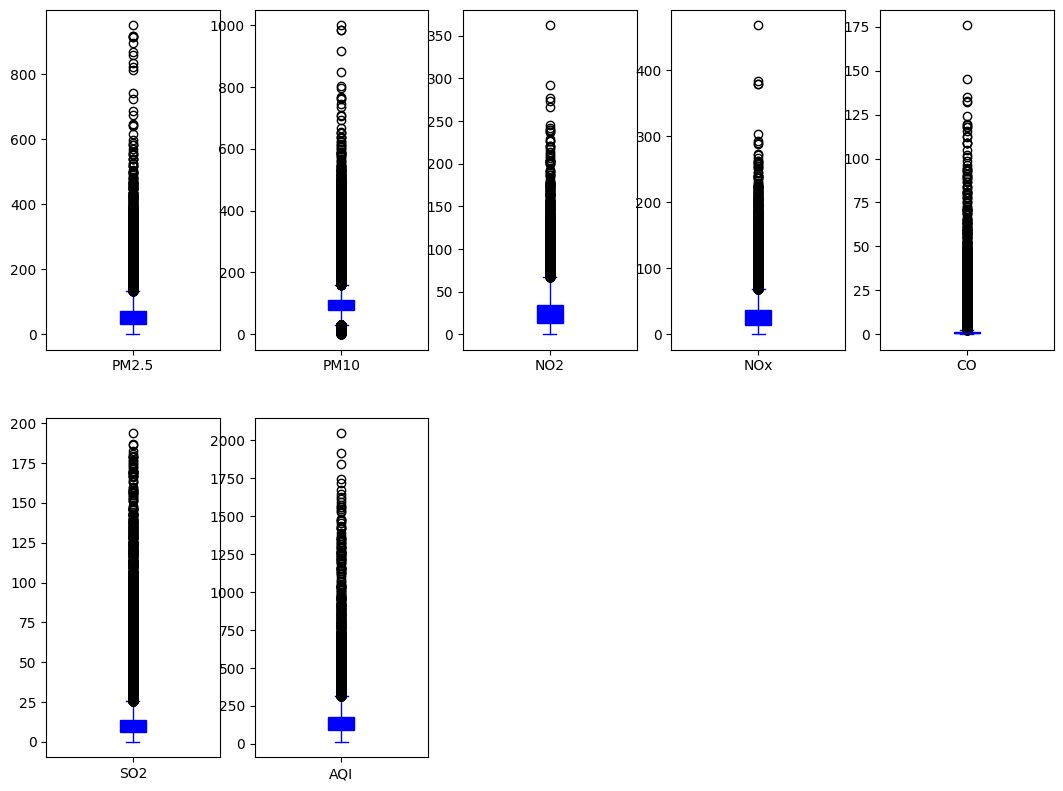

In [ ]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='blue',patch_artist=True)
plt.show()

* calculates quantiles (specifically the 25th, 50th, and 75th percentiles) for the DataFrame df. These quantiles are often used in exploratory data analysis (EDA) to summarize the distribution of data.

In [ ]:
Q1=np.quantile(df, 0.25)
Q2=np.quantile(df, 0.50)
Q3=np.quantile(df, 0.75)
Q1, Q2, Q3

(9.16, 29.0, 87.4)

* calculates the Interquartile Range (IQR), which is a key metric for understanding the spread of the middle 50% of your data.

In [ ]:
IQR = Q3 - Q1
IQR

78.24000000000001

* remove_outliers_iqr that filters out outliers from a specified column in a DataFrame (log_data) using the Interquartile Range (IQR) method.



In [ ]:
# def remove_outliers_iqr(log_data, column):
#     # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
#     Q1 = log_data[column].quantile(0.25)
#     Q3 = log_data[column].quantile(0.75)

#     # Calculate the Interquartile Range (IQR)
#     IQR = Q3 - Q1

#     # Define the lower and upper bounds for detecting outliers
#     lower_bound = Q1 - 1.5  * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     # Filter out the outliers from the DataFrame
#     log_data_filtered = log_data[(log_data[column] >= lower_bound) & (log_data[column] <= upper_bound)]
#     return log_data_filtered
# for i in ["PM2.5","PM10","NOx","NO2","CO","SO2"]:
#     log_data = remove_outliers_iqr(log_data, i)

# **7. Feature Engineer**

* it helps reduce skewness

In [ ]:
# Applying log transformation
log_data = np.log(df + 1)  # Adding 1 to avoid log(0)

* creates a histogram to visualize the distribution of the log-transformed data.



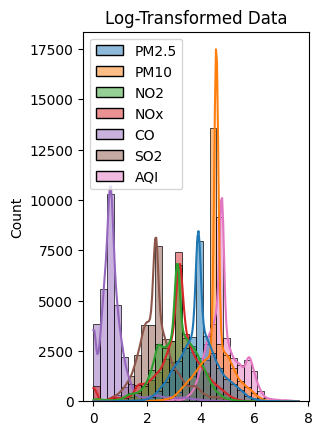

In [ ]:
# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

In [ ]:
log_data.shape

(29531, 7)

* this code generates histograms for each individual feature (column) in the log-transformed data.

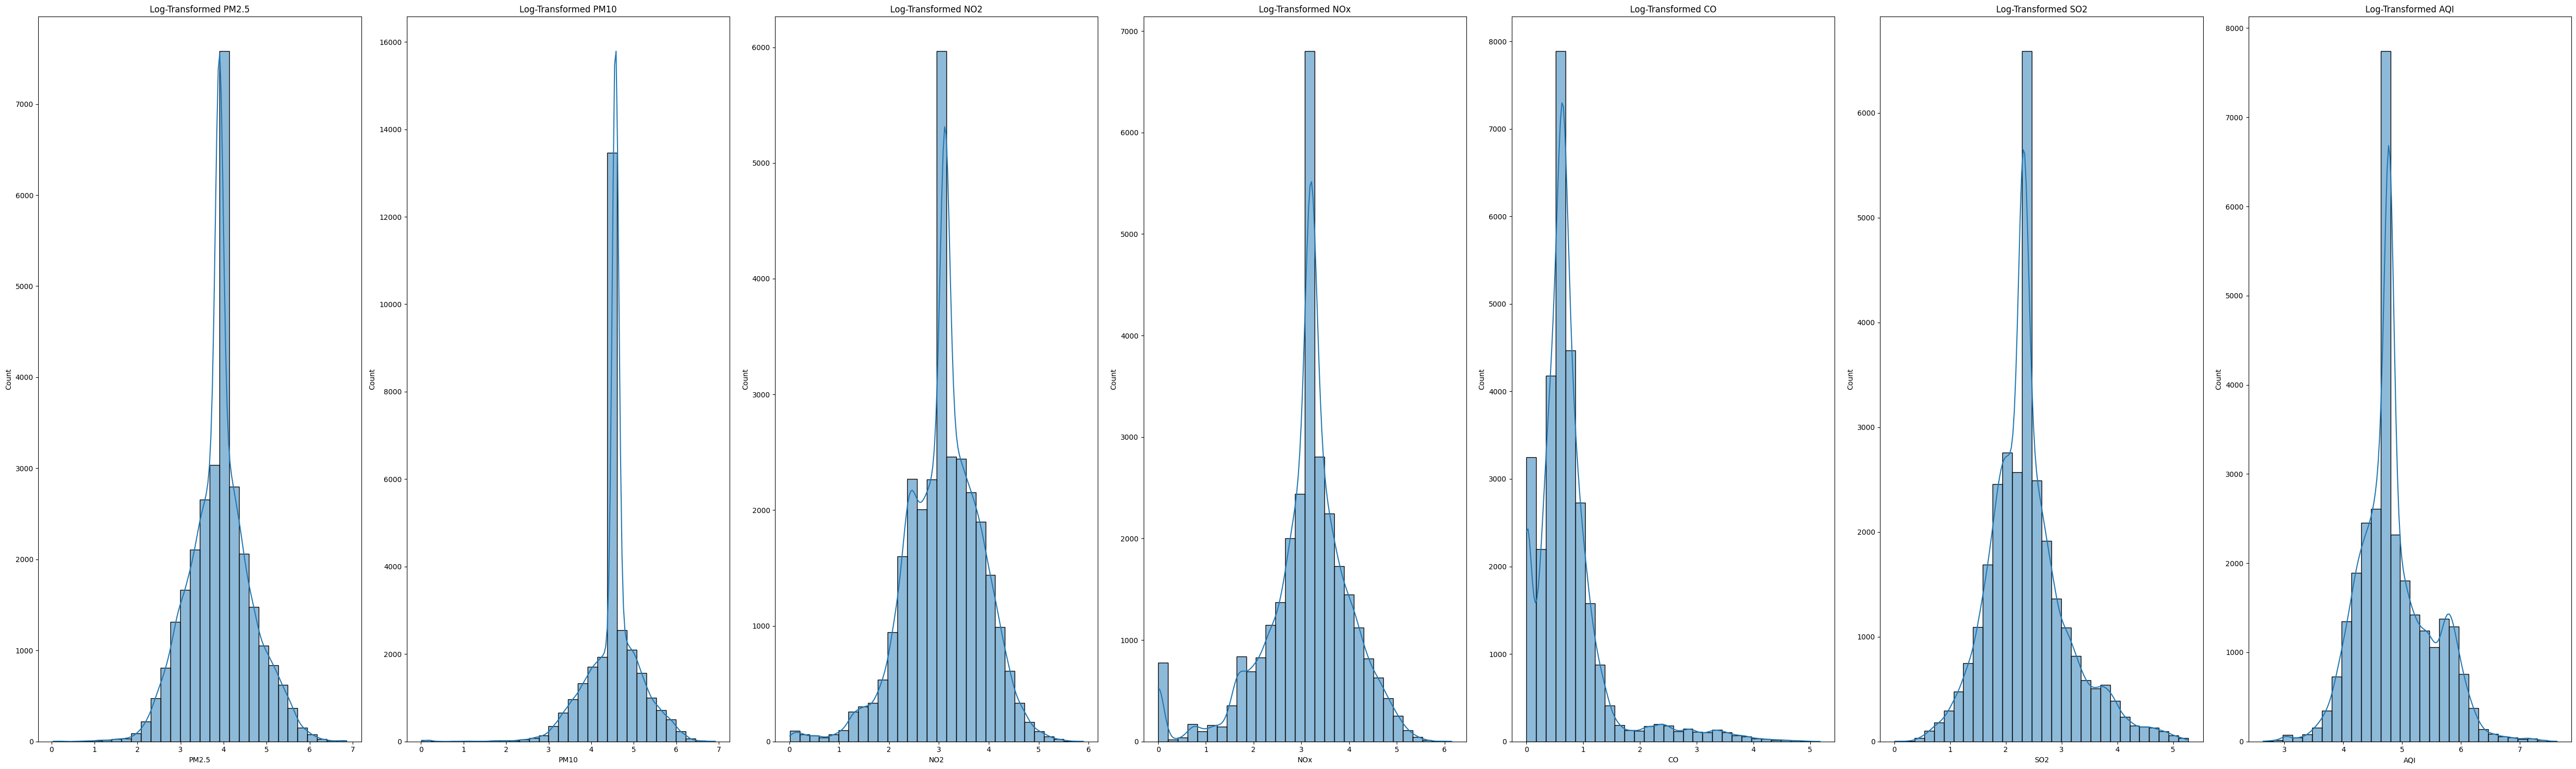

In [ ]:
# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30,kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

In [ ]:
log_data

,PM2.5,PM10,NO2,NOx,CO,SO2,AQI
0,3.903386,4.571407,2.955951,2.898671,0.652325,3.354804,4.779123
1,3.903386,4.571407,2.814810,2.859913,0.678034,3.240637,4.779123
2,3.903386,4.571407,3.010621,3.424263,2.912351,3.403528,4.779123
3,3.903386,4.571407,2.969388,2.942859,0.993252,2.975019,4.779123
4,3.903386,4.571407,3.109953,3.657389,3.139833,3.697096,4.779123
...,...,...,...,...,...,...,...
29526,2.773838,3.950089,3.260402,3.022374,0.385262,2.256541,3.737670
29527,3.233961,4.318687,3.298057,2.863914,0.418710,2.618855,4.262680
29528,3.174297,4.200655,3.418710,2.961658,0.392042,2.242835,4.234107
29529,2.870169,3.931237,3.409827,2.985682,0.418710,2.383243,4.007333


* This code generates box plots for each feature (column) in the log-transformed dataset log_data.

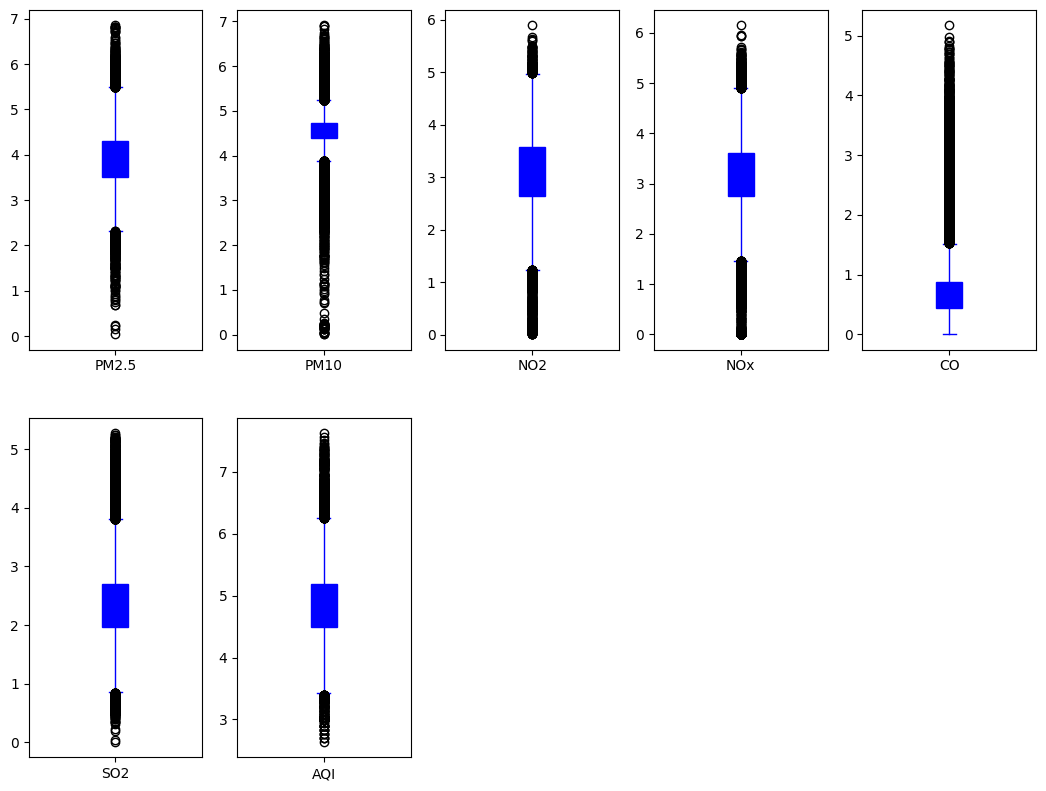

In [ ]:
log_data.plot(kind='box',subplots=True,layout=(3,5),figsize=(13,15),color='blue',patch_artist=True)
plt.show()

* helps you see how strongly the columns in your data are connected to each other.




In [ ]:
log_data.corr()

,PM2.5,PM10,NO2,NOx,CO,SO2,AQI
PM2.5,1.000000,0.677246,0.441388,0.372125,0.239918,0.246893,0.791353
PM10,0.677246,1.000000,0.417915,0.362976,0.153879,0.277743,0.630454
NO2,0.441388,0.417915,1.000000,0.505152,0.265964,0.269297,0.466398
NOx,0.372125,0.362976,0.505152,1.000000,0.249185,0.283350,0.405340
CO,0.239918,0.153879,0.265964,0.249185,1.000000,0.384988,0.542678
SO2,0.246893,0.277743,0.269297,0.283350,0.384988,1.000000,0.401969
AQI,0.791353,0.630454,0.466398,0.405340,0.542678,0.401969,1.000000


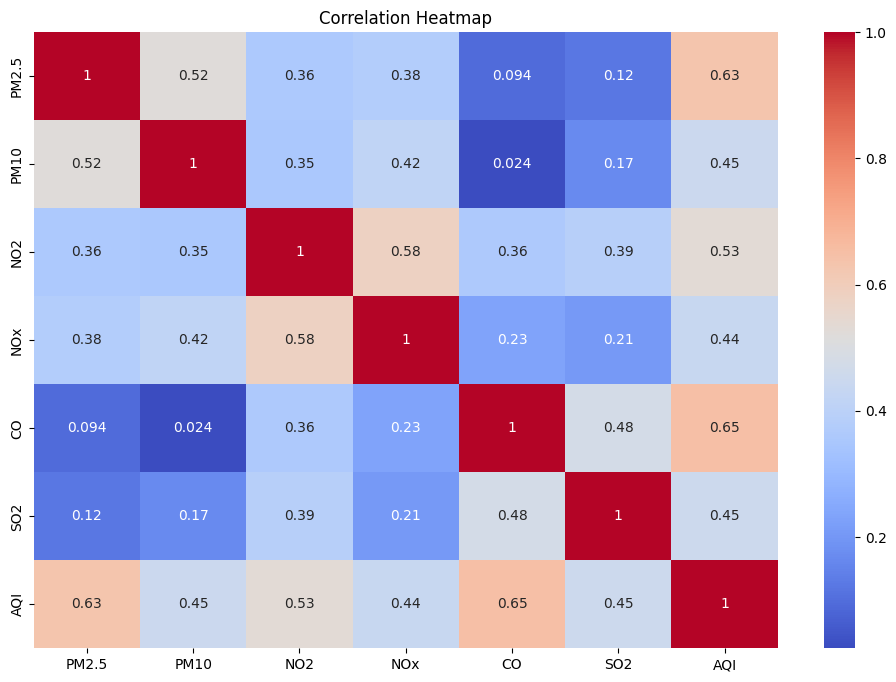

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# **8. Dimensionality Reduction**

* The code you're asking about selects specific columns from a DataFrame log_data to create two separate sets: x and y.

In [ ]:
x=log_data[["PM2.5","PM10","NO2","NOx","CO","SO2"]]
y=log_data["AQI"]

* All your data features are on the same scale so that they can be compared fairly and analyzed effectively.








In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the features before PCA
features = log_data[["PM2.5","PM10","NO2","NOx","CO","SO2","AQI"]]
#std = StandardScaler()

# **9. Data Scaling**

* **scaling** makes sure all features are on the same level, helping the model learn and perform better.
* **standardization** makes data easier for the model to understand and compare by putting all features on the same scale.
* **normalization** scales features to a range (like 0 to 1), making them easier to compare and improving the performance of certain models.







In [ ]:
std=StandardScaler()
scaled_X =std.fit_transform(features)
scaled_X
# x = scaled_X[:, :-1]  # All columns except the last
# y = scaled_X[:, -1]  # Last column (AQI)

array([[-0.01218052,  0.05124482, -0.18423346, ..., -0.14972819,
         1.3630355 , -0.13903446],
       [-0.01218052,  0.05124482, -0.37206697, ..., -0.10950972,
         1.20210724, -0.13903446],
       [-0.01218052,  0.05124482, -0.11147847, ...,  3.38588314,
         1.43171569, -0.13903446],
       ...,
       [-1.02634765, -0.57346249,  0.43161256, ..., -0.55691823,
        -0.20438098, -1.02796751],
       [-1.44939111, -1.02742377,  0.4197908 , ..., -0.5151981 ,
        -0.00646393, -1.3978391 ],
       [-1.58512592, -0.56665858,  0.30934145, ..., -0.4447625 ,
        -1.77104152, -1.52099335]])

 # **10. Initial Modelling and Hypothesis Testing**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

* split your dataset into training and testing sets, which is a crucial step in building and evaluating machine learning models

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(23624, 6)

In [ ]:
x_test.shape

(5907, 6)

* Linear regression is used to predict a continuous outcome

In [ ]:
model=LinearRegression()

*  teaches the model how to predict the right output based on the input data.

In [ ]:
model.fit(x_train,y_train)

LinearRegression()

 * model's best guesses for the outcomes based on the test data.

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([4.61404827, 4.61404827, 4.91772061, ..., 4.88815426, 4.45707233,
       4.82686356])

* It looks like you are trying to plot a regression line to visualize the relationship between predicted Air Quality Index (AQI) values and actual AQI values using seaborn's regplot.

Text(0, 0.5, 'Actual AQI')

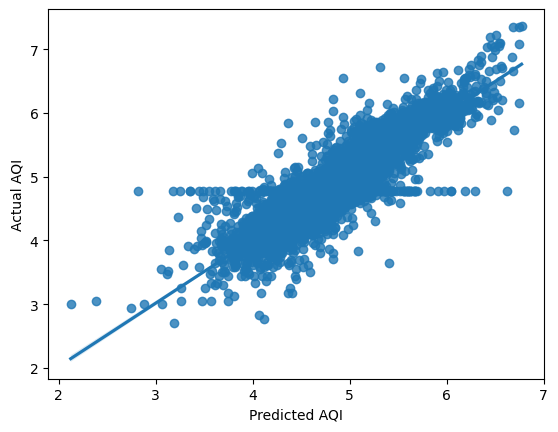

In [ ]:
sns.regplot(x=y_pred,y=y_test)
plt.xlabel("Predicted AQI")
plt.ylabel("Actual AQI")

* helps you see how good or bad the model is at predicting the correct values by measuring the difference between the true and predicted outcomes.








In [ ]:
mean_squared_error(y_test,y_pred)

0.08057746505902721

* RMSE shows the average size of prediction errors, with extra focus on larger errors.

In [ ]:
root_mean_squared_error=np.sqrt(mean_squared_error(y_test,y_pred))
root_mean_squared_error

0.2838617005850335

* it helps you understand the goodness of fit for your regression model.

In [ ]:
r2_score(y_test,y_pred)

0.777187756728604

* MAE tells you the average error size in your model’s predictions without considering if the predictions are too high or too low.

In [ ]:
mean_absolute_error(y_test,y_pred)

0.2083720311007719

* predict the Air Quality Index (AQI) based on user-input values for pollutants.

In [ ]:
PM2=float(input("Enter PM2.5: "))
PM10=float(input("Enter PM10: "))
NO2=float(input("Enter NO2: "))
NOx=float(input("Enter NOx: "))
CO=float(input("Enter CO: "))
SO2=float(input("Enter SO2: "))
user_input=[[PM2,PM10,NO2,NOx,CO,SO2]]
#scaled_user_input=std.fit_transform(user_input)
AQI=model.predict(user_input)
print("AQI: ",AQI)